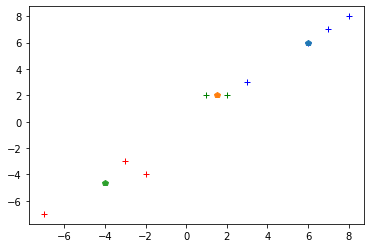

centriods: [array([6., 6.]), array([1.5, 2. ]), array([-4.        , -4.66666667])]


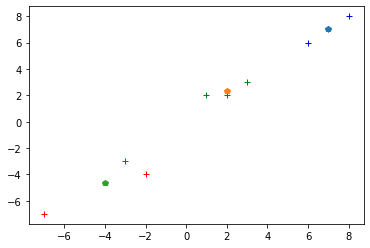

centriods: [array([7., 7.]), array([2.        , 2.33333333]), array([-4.        , -4.66666667])]
0.9298618490967057


In [149]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[1, 2],
                [3, 3],
                [2, 2],
                [8, 8],
                [6, 6],
                [7, 7],
                [-3, -3],
                [-2, -4], 
                [-7, -7]])
# Assign centroids
def k_mean(c0, c1, c2):
  centroids = [c0, c1, c2]
  # list for keeping k cluster for each data
  k = [0]*10
  # finding the cluster for each data
  old_centriods = list(np.zeros((1, 2)))*4
  while(1):
    member_in_cluster = {0:[], 1:[], 2:[]}
    for index, point in enumerate(data):
      dis_list = []
      for centroid in centroids:
        dis = np.sqrt(np.sum((point - centroid)**2))
        dis_list.append(dis)
      cluster = np.argmin(dis_list)
      k[index] = cluster
      member_in_cluster[cluster].append(point)
    # updating the centroids
    for cluster, members in member_in_cluster.items():
      members = np.array(members)
      plt.plot(members[:, 0], members[:, 1], ['b+', 'g+', 'r+'][cluster])
      centroids[cluster] = np.average(members, axis=0)
    for c in centroids:
      plt.plot(c[0], c[1], 'p-')
    plt.show()
    print(f'centriods: {centroids}')
    if old_centriods == centroids:
      return old_centriods, member_in_cluster
    old_centriods = centroids
    
def between_cluster_var(centroids, member_in_cluster):
  all_data_centroid = np.average(data, axis=0)
  var = 0
  N = 10
  for cluster_i, members in member_in_cluster.items():
    members = np.array(members)
    cluster_centroid = np.average(members, axis=0)
    var += (len(members)*np.sum((cluster_centroid - all_data_centroid)**2))/(N-1)
  # print(f'between_cluster_var: {var}')
  return var

def get_var():
  all_data_centroid = np.average(data, axis=0)
  N = 10
  var = np.sum((data - all_data_centroid)**2)/(N-1)
  return var

def explained_var(centroids, member_in_cluster):
  return between_cluster_var(centroids, member_in_cluster) / get_var()

c0 = (3, 3)
c1 = (2, 2)
c2 = (-3, -3)
centroids, members = k_mean(c0, c1, c2)
print(explained_var(centroids, members))

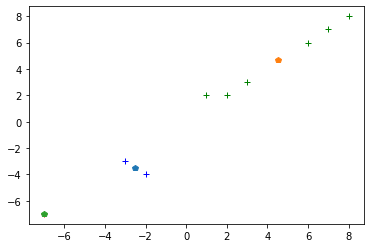

centriods: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]


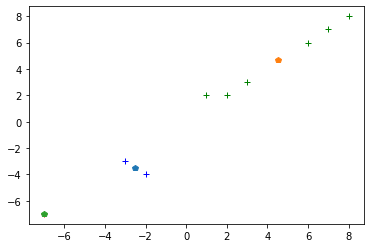

centriods: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]
0.8138947927736451


In [150]:
c0 = (-3, -3)
c1 = (2, 2)
c2 = (-7, -7)
centroids, members = k_mean(c0, c1, c2)
print(explained_var(centroids, members))

In [160]:
import pandas as pd
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [162]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [163]:
def impute(df):
  train_med_age = df["Age"].median()
  df["Age"] = df["Age"].fillna(train_med_age)
  print(f'train median age: {train_med_age}')

  df.loc[df["Embarked"] == "S", "Embarked"] = 0
  df.loc[df["Embarked"] == "C", "Embarked"] = 1
  df.loc[df["Embarked"] == "Q", "Embarked"] = 2
  train_mod_embark = list(df["Embarked"].mode())[0]
  print(f'mode embarked: {train_mod_embark}')
  df["Embarked"] = df["Embarked"].fillna(train_mod_embark)

  df.loc[df["Sex"] == "male", "Sex"] = 0
  df.loc[df["Sex"] == "female", "Sex"] = 1
  train_mod_sex = list(df["Sex"].mode())[0]
  df["Sex"] = df["Sex"].fillna(train_mod_sex)
  return df

In [164]:
train = impute(train)
train

train median age: 28.0
mode embarked: 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [165]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
y = np.array(train['Survived'])

In [173]:
def h(value):
  return 1/(1+np.exp(-value))
def logistic_regression(param_num, learning_rate, epoch, data):
  theta = np.array([0.5]*param_num)
  learning_rate = learning_rate
  for e in range(epoch):
    for i in range(len(data)):
      predict = h(data[i].dot(theta))
      gradient = learning_rate*(y[i]-predict)*data[i]
      theta += gradient
    error = np.sqrt(np.sum((y - h(data.dot(theta)))**2))
    if e % 50 == 0:
      print(error)
  return theta

In [174]:
theta = logistic_regression(4, 0.05, 1000, data)

18.484918325542413
14.673949725348512
14.704992138214271
14.644423266759844
14.668876477677752
14.654855396817618
14.59301284261833
14.338616912114345
14.662118788670375
14.671981998322583
14.421384001347912
13.18258375849629
14.69419182222592
14.369876605447338
14.656182361583236
13.964615996265897
14.701818029422498
14.64829692705079
14.357547662063249
14.699229207913515


In [169]:
test_imputed = impute(test)
test_imputed

train median age: 27.0
mode embarked: 0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NaN,0


In [170]:
test_data = np.array(test_imputed[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
y_test = test_imputed[['PassengerId',"Pclass","Sex","Age","Embarked"]]
y_test['dot_product'] = [np.array([a1, a2, a3, a4]).dot(theta) for a1,a2,a3,a4  in zip(y_test.Pclass, y_test.Sex, y_test.Age, y_test.Embarked)]
y_test['sigmoid'] = h(y_test['dot_product'])
y_test['Survived'] = (y_test['sigmoid'] >= 0.5) + 0
y_test = y_test[['PassengerId', 'Survived']]
y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [141]:
from google.colab import files

y_test.to_csv('pattern_hw.csv')
files.download('pattern_hw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
data2 = train[["Pclass","Sex","Age","Embarked"]]
data2['Age_squared'] = data2['Age']**2
data2['Sex_times_Age'] = data2['Sex'] * data2['Age']
data2_np = np.array(data2[["Pclass","Sex","Age","Embarked", 'Age_squared', 'Sex_times_Age']].values, dtype = float)
y = np.array(train['Survived'])
theta = logistic_regression(6, 0.05, 1000, data2_np)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


18.19338820128373
16.186414056019395
14.696938456699069
17.11724276862369
17.11724276862369
17.08800749063506
16.15549442140351
17.08800749063506
17.08800749063506
17.08800749063506
17.08800749063506
15.968719422671311
16.792855623746647
15.937377450509228
15.937377450509228
16.0
15.874507866387544
15.968719422671311
15.684387141358123
15.716233645501712


In [178]:
y_test2 = test_imputed[['PassengerId',"Pclass","Sex","Age","Embarked"]]
y_test2['Age_squared'] = y_test2['Age']**2
y_test2['Sex_times_Age'] = y_test2['Sex'] * y_test2['Age']
y_test2['dot_product'] = [np.array([a1, a2, a3, a4, a5, a6]).dot(theta) for a1,a2,a3,a4,a5,a6  in zip(y_test2.Pclass, y_test2.Sex, y_test2.Age, y_test2.Embarked, y_test2.Age_squared, y_test2.Sex_times_Age)]
y_test2['sigmoid'] = h(y_test2['dot_product'])
y_test2['Survived'] = (y_test2['sigmoid'] >= 0.5) + 0
y_test2 = y_test2[['PassengerId', 'Survived']]
y_test2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [179]:
from google.colab import files

y_test2.to_csv('pattern_hw_2.csv')
files.download('pattern_hw_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
data3 = train[["Sex","Age"]]
data3_np = np.array(data3[["Sex","Age"]].values, dtype = float)
y = np.array(train['Survived'])
theta = logistic_regression(2, 0.05, 1000, data3_np)

18.179044503328814
14.276850083963797
13.78218227135262
13.756849725200702
14.205690085305974
14.267360745669885
13.915396570236544
13.872724150021497
16.834855366638124
13.835217585449769
14.188942868656529
13.886799593305186
13.757980255887817
14.073791942854767
13.781798840725676
13.896078839029244
13.90363159135311
13.464757493280027
13.940291980917882
13.858939519485618


In [183]:
y_test3 = test_imputed[["Sex","Age", 'PassengerId']]
y_test3['dot_product'] = [np.array([a1, a2]).dot(theta) for a1,a2  in zip(y_test3.Sex, y_test3.Age)]
y_test3['sigmoid'] = h(y_test3['dot_product'])
y_test3['Survived'] = (y_test3['sigmoid'] >= 0.5) + 0
y_test3 = y_test3[['PassengerId', 'Survived']]
y_test3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [184]:
from google.colab import files

y_test3.to_csv('pattern_hw_3.csv')
files.download('pattern_hw_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>